In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
%matplotlib inline


In [41]:
data = pd.read_csv('./kmeans_data/Mall_Customers.csv')
print(data.sample(5))

X = data.iloc[:,[3,4]].values
# print(data['Age'].max())
# print(data['Annual Income (k$)'].max())
# print(X)


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
177         178    Male   27                  88                      69
58           59  Female   27                  46                      51
16           17  Female   35                  21                      35
90           91  Female   68                  59                      55
113         114    Male   19                  64                      46


[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30273.394312070028, 25043.890043290034, 21850.16528258562, 19740.010370359298, 17577.687828862057, 16092.661877462222, 14707.467231203611, 13157.201830362632, 12048.564244089244, 10910.231221120928, 9999.680988044349, 9285.774540182898, 8809.474075924072]


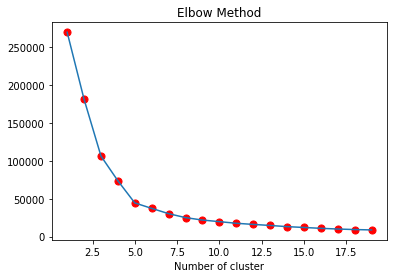

In [14]:
wcss = []
# n_cluster 클러스터의 중심수
# random_state 시드값
# max_iter최대 반복 수(기본값300)
# n_init 초기 클러스터의 중심위치 시도횟수 (기본값10)

#wcss를 통해 k개의 클러스터를 좀더 확실하게 정하 수 있다고 하는데..잘 모르겠다..
# Elbow Method - 클러스터의 수를 순차적으로 늘려가면서 결과 모니터링
# within group에서 그래프에서 기울기가 완만해 지는 곳을 ElbowPoint라해서 이K가 적정값이라 판단.
for i in range(1, 20):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    plt.scatter(i, kmeans.inertia_, s=50, c='r')
print(wcss)
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel("Number of cluster")
plt.show()

     Annual Income (k$)  Spending Score (1-100)  pred
0                    15                      39     3
1                    15                      81     2
2                    16                       6     3
3                    16                      77     2
4                    17                      40     3
..                  ...                     ...   ...
195                 120                      79     1
196                 126                      28     4
197                 126                      74     1
198                 137                      18     4
199                 137                      83     1

[200 rows x 3 columns]


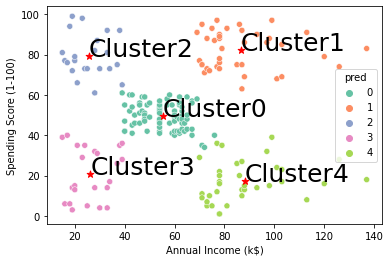

In [125]:
n_clusters=5
Kmean = KMeans(n_clusters)
Kmean.fit(X)
center = Kmean.cluster_centers_

X_pred = Kmean.predict(X)


data2 = pd.read_csv('./kmeans_data/Mall_Customers.csv')
data2 = data2.drop(columns=['CustomerID','Genre','Age'], axis=1)

data2['pred'] = X_pred
print(data2)

sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue='pred',data=data2, palette="Set2")

for i in range(n_clusters):
    plt.scatter(center[i][0], center[i][1],s=50, c='r', marker='*')
    plt.text(center[i][0], center[i][1], "Cluster"+str(i), size=25)



In [52]:
# print(data)
# # data.columns=["Annual Income (k$)", "Spending Score (1-100)"]
# X = data.iloc[:,[3,4]].values

# # X['cluster'] = np.array(clu)